In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Metro Bike 2024-Q2

In [3]:
df = pd.read_csv('/Users/cheng/Desktop/Pocketride project/metro-trips-2024-q2.csv')

In [11]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,trip_duration
0,372445882,13,2024-04-01 00:11:00,2024-04-01 00:24:00,4293,34.062279,-118.271523,4293,34.062279,-118.271523,30390,30,Round Trip,Monthly Pass,electric,13.0
1,372445942,5,2024-04-01 00:36:00,2024-04-01 00:41:00,3062,34.047749,-118.243172,4578,34.042980,-118.252953,20016,30,One Way,Monthly Pass,standard,5.0
2,372445944,9,2024-04-01 00:37:00,2024-04-01 00:46:00,4538,34.065430,-118.308823,4440,34.061661,-118.298241,20035,30,One Way,Monthly Pass,standard,9.0
3,372456735,15,2024-04-01 00:51:00,2024-04-01 01:06:00,4447,34.061600,-118.281990,4410,34.063351,-118.296799,13779,1,One Way,Walk-up,standard,15.0
4,372499944,324,2024-04-01 01:03:00,2024-04-01 06:27:00,4220,34.074829,-118.258728,4220,34.074829,-118.258728,13626,30,Round Trip,Monthly Pass,standard,324.0


In [10]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Calculate the trip duration in minutes
df['trip_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

In [18]:
a=(df['trip_duration'] == 0).sum()
a

# Cancellations or Incomplete Trips: 
    # Users may have checked out a bike and immediately returned it due to errors, wrong bike selection, or technical issues.
# Test rides or calibration data 
# Clock Sync Issues on the bike system, stations, or GPS devices

49

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143616 entries, 0 to 143615
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              143616 non-null  int64         
 1   duration             143616 non-null  int64         
 2   start_time           143616 non-null  datetime64[ns]
 3   end_time             143616 non-null  datetime64[ns]
 4   start_station        143616 non-null  int64         
 5   start_lat            143590 non-null  float64       
 6   start_lon            143590 non-null  float64       
 7   end_station          143616 non-null  int64         
 8   end_lat              141248 non-null  float64       
 9   end_lon              141248 non-null  float64       
 10  bike_id              143616 non-null  int64         
 11  plan_duration        143616 non-null  int64         
 12  trip_route_category  143616 non-null  object        
 13  passholder_typ

In [21]:
df.isnull().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat                26
start_lon                26
end_station               0
end_lat                2368
end_lon                2368
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
trip_duration             0
dtype: int64

# Graphs

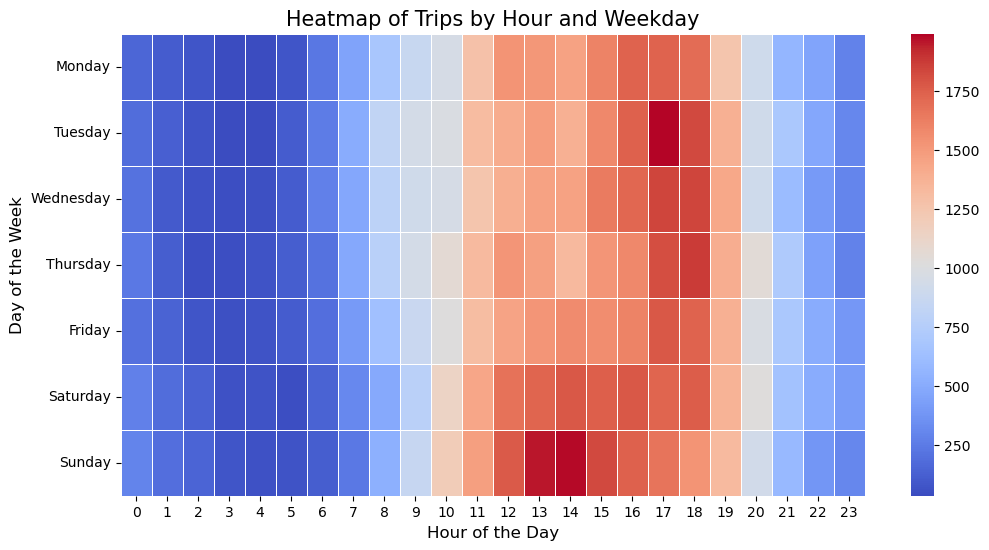

In [29]:
# Extract hour and weekday from the 'started_at' column for analysis
df['start_hour'] = df['start_time'].dt.hour
df['weekday'] = df['start_time'].dt.day_name()

# Pivot table for heatmap: Trips by hour and weekday
trips_by_hour_weekday = df.pivot_table(index='weekday', columns='start_hour', aggfunc='size', fill_value=0)

# Reorder weekdays to start from Monday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_hour_weekday = trips_by_hour_weekday.reindex(weekday_order)

# Heatmap: Number of trips by hour and weekday
plt.figure(figsize=(12, 6))
sns.heatmap(trips_by_hour_weekday, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Heatmap of Trips by Hour and Weekday', fontsize=15)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.show()

In [33]:
print(df.dtypes)


trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station                   int64
start_lat                     float64
start_lon                     float64
end_station                     int64
end_lat                       float64
end_lon                       float64
bike_id                         int64
plan_duration                   int64
trip_route_category            object
passholder_type                object
bike_type                      object
trip_duration                 float64
start_hour                      int64
weekday                        object
dtype: object


In [36]:
print(df_filtered['passholder_type'].unique())

['Monthly Pass' 'Walk-up' 'Annual Pass' 'One Day Pass']


In [38]:
df_filtered['passholder_type'] = df_filtered['passholder_type'].astype('category')

/var/folders/sf/qkrwk5617wgdw0frsrqmg17r0000gn/T/ipykernel_78228/2931977191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['passholder_type'] = df_filtered['passholder_type'].astype('category')


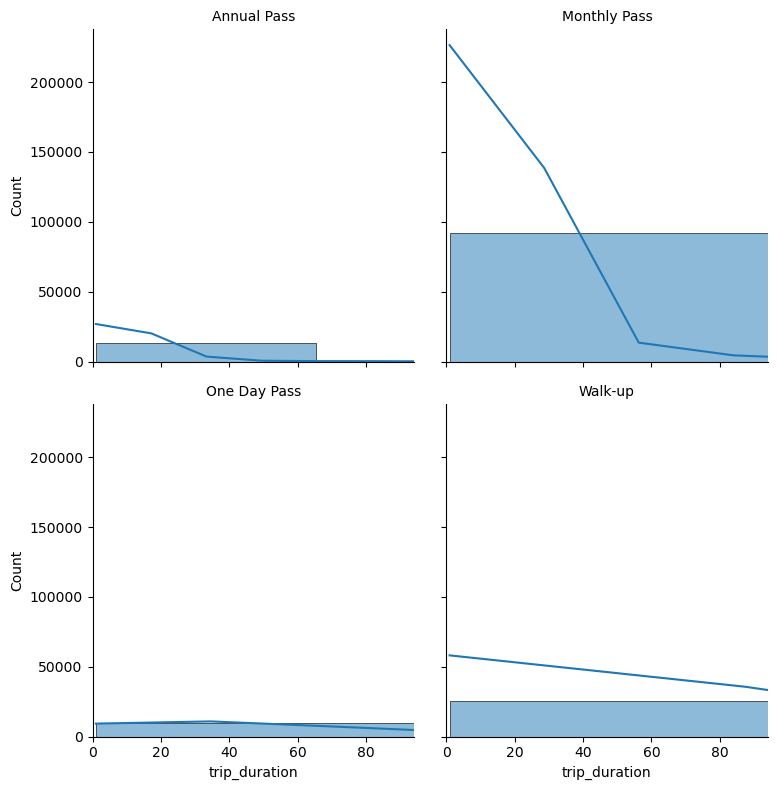

In [41]:
g = sns.FacetGrid(df_filtered, col="passholder_type", col_wrap=2, height=4)
g.map(sns.histplot, "trip_duration", bins=50, kde=True)
g.set_titles("{col_name}")
plt.xlim(0, df_filtered['trip_duration'].quantile(0.95))  # Limit to the 95th percentile
plt.show()

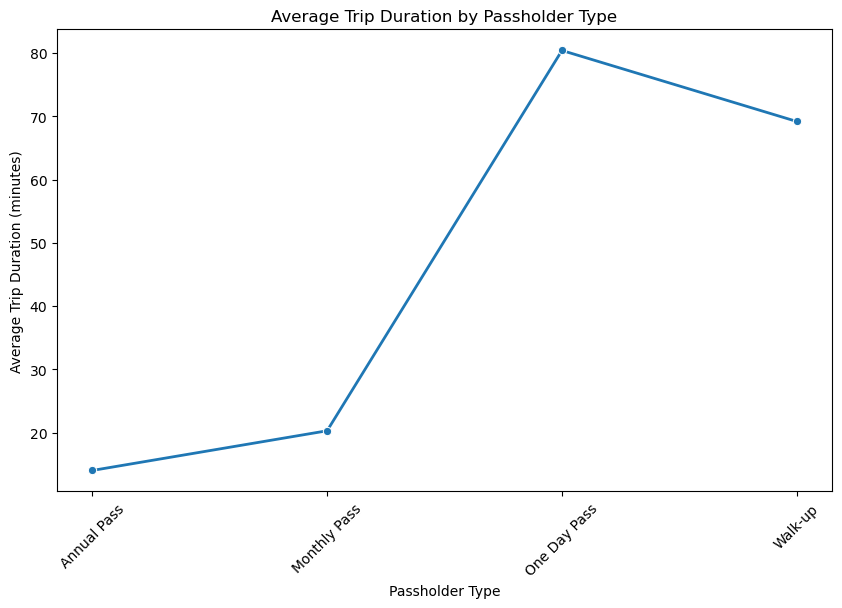

In [45]:
# Group the data by 'passholder_type' and calculate the average trip duration
avg_trip_duration_by_passholder = df_filtered.groupby('passholder_type')['trip_duration'].mean().reset_index()

# Sort by average trip duration for better visualization
avg_trip_duration_by_passholder = avg_trip_duration_by_passholder.sort_values(by='trip_duration')

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_trip_duration_by_passholder, x='passholder_type', y='trip_duration', marker='o', linewidth=2)

plt.title('Average Trip Duration by Passholder Type')
plt.xlabel('Passholder Type')
plt.ylabel('Average Trip Duration (minutes)')

plt.xticks(rotation=45)

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


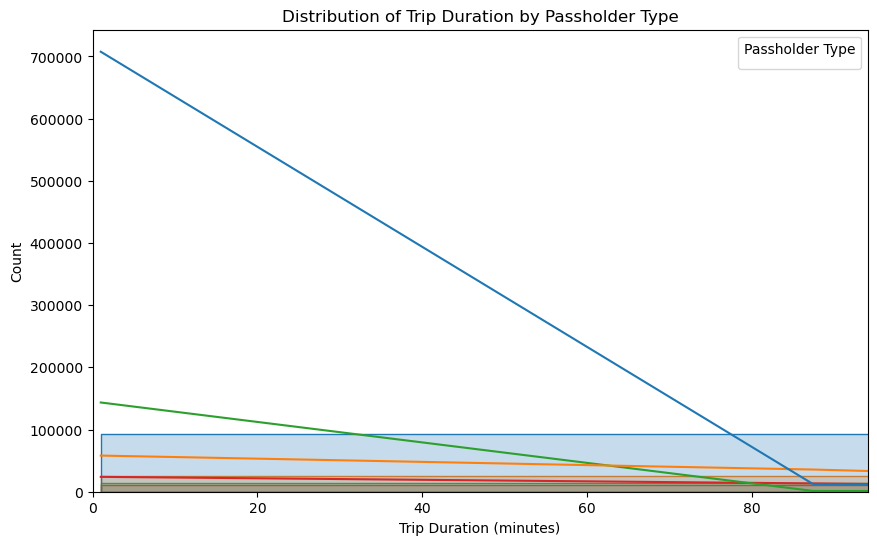

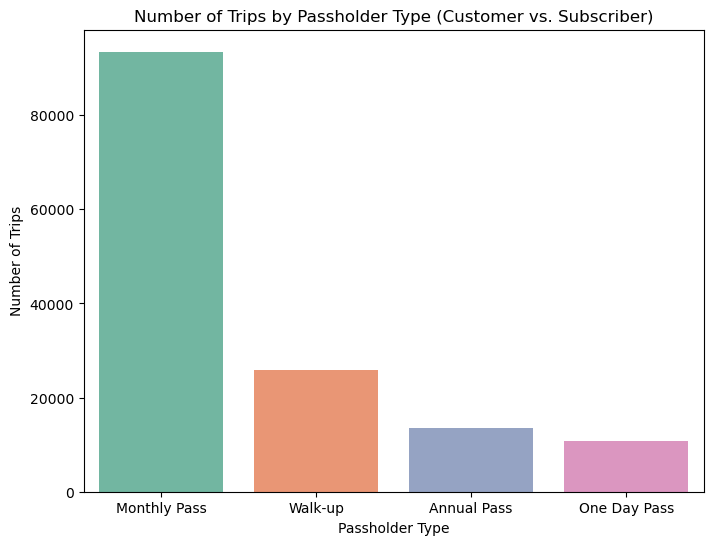

In [34]:
df['trip_duration'] = pd.to_numeric(df['trip_duration'], errors='coerce')
df_filtered = df[df['trip_duration'] > 0]

# Distribution of Trip Duration by Passholder Type (Customer vs. Subscriber)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='trip_duration', hue='passholder_type', bins=50, kde=True, element="step")
plt.title('Distribution of Trip Duration by Passholder Type')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Count')
plt.xlim(0, df_filtered['trip_duration'].quantile(0.95))  # Limit to the 95th percentile for better visualization
plt.legend(title='Passholder Type')
plt.show()

# Number of Trips by Passholder Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filtered, x='passholder_type', palette='Set2')
plt.title('Number of Trips by Passholder Type (Customer vs. Subscriber)')
plt.xlabel('Passholder Type')
plt.ylabel('Number of Trips')
plt.show()


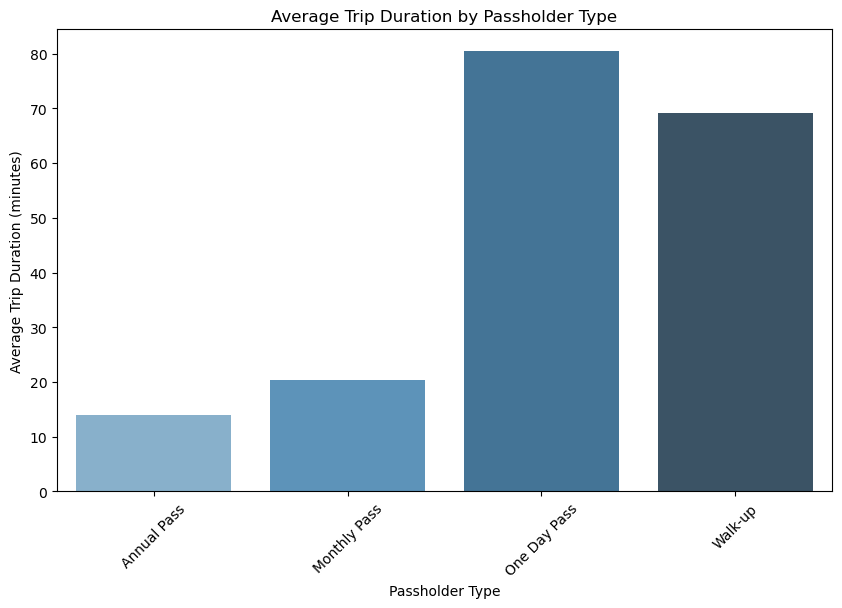

In [49]:
# Duration of trip

# Group by passholder_type and calculate the average trip duration
avg_trip_duration_by_passholder = df_filtered.groupby('passholder_type')['trip_duration'].mean().reset_index()
avg_trip_duration_by_passholder.columns = ['passholder_type', 'avg_trip_duration']

# Plot a bar graph for the average trip duration by passholder type
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_trip_duration_by_passholder, x='passholder_type', y='avg_trip_duration', palette='Blues_d')
plt.title('Average Trip Duration by Passholder Type')
plt.xlabel('Passholder Type')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

In [35]:
# Length of trip

# Function to calculate the Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers (mean value)
    r = 6371.0  
    return c * r


df['trip_length_km'] = haversine(df['start_lat'], df['start_lon'], df['end_lat'], df['end_lon'])

df[['start_lat', 'start_lon', 'end_lat', 'end_lon', 'trip_length_km']].head()


,start_lat,start_lon,end_lat,end_lon,trip_length_km
0,34.062279,-118.271523,34.062279,-118.271523,0.000000
1,34.047749,-118.243172,34.042980,-118.252953,1.045623
2,34.065430,-118.308823,34.061661,-118.298241,1.061044
3,34.061600,-118.281990,34.063351,-118.296799,1.377984
4,34.074829,-118.258728,34.074829,-118.258728,0.000000


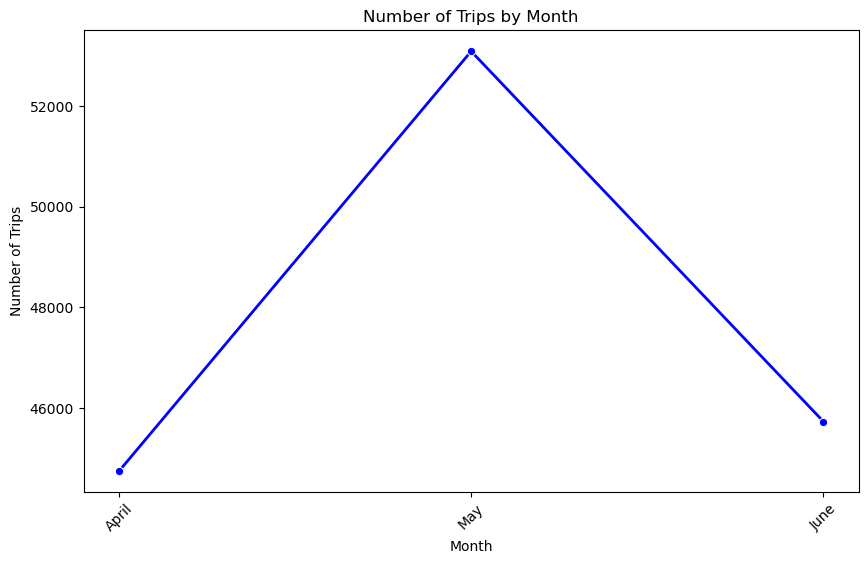

In [48]:
# Number of trips by month

df_filtered['start_time'] = pd.to_datetime(df_filtered['start_time'])

df_filtered['month'] = df_filtered['start_time'].dt.strftime('%B')  # Extract month name
df_filtered['month_num'] = df_filtered['start_time'].dt.month  # Extract numerical month for sorting

# Group by month and count the number of trips
trips_by_month = df_filtered.groupby('month_num')['trip_id'].count().reset_index()
trips_by_month.columns = ['month_num', 'number_of_trips']

# Add month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
trips_by_month['month'] = trips_by_month['month_num'].map(month_names)

# Sort by the month number to maintain the correct order
trips_by_month = trips_by_month.sort_values('month_num')

plt.figure(figsize=(10, 6))
sns.lineplot(data=trips_by_month, x='month', y='number_of_trips', marker='o', linewidth=2, color='blue')
plt.title('Number of Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.show()


# Bay Wheel Lyft 2024-09

In [69]:
bw = pd.read_csv('/Users/cheng/Desktop/Pocketride project/202409-baywheels-tripdata.csv')

In [63]:
bw.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_minutes
0,AAFD5548143DCE0A,electric_bike,2024-09-10 08:45:14.070,2024-09-10 09:06:58.772,30th St at San Jose Ave,SF-T21,2nd St at Folsom St,SF-H29,37.742314,-122.423181,37.785199,-122.396217,member,21.745033
1,7814A8CB2C9A70BB,electric_bike,2024-09-11 07:53:30.649,2024-09-11 08:12:53.687,30th St at San Jose Ave,SF-T21,2nd St at Folsom St,SF-H29,37.742314,-122.423181,37.785199,-122.396217,member,19.383967
2,52170B200ED0FC6C,classic_bike,2024-09-12 23:20:34.071,2024-09-13 06:46:52.702,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,The Embarcadero at Steuart St,SF-F30-1,37.771767,-122.386689,37.791401,-122.391038,casual,446.310517
3,64DCD491A935BD82,classic_bike,2024-09-21 12:35:12.297,2024-09-21 12:39:00.009,Fifth St at Delaware St,BK-C1,Addison St at Fourth St,BK-D1,37.870407,-122.299676,37.866249,-122.299371,casual,3.795200
4,F9C466FFD635DF57,classic_bike,2024-09-26 08:00:35.009,2024-09-26 08:10:24.804,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,The Embarcadero at Steuart St,SF-F30-1,37.771767,-122.386689,37.791401,-122.391038,member,9.829917


In [53]:
bw.describe()

,start_lat,start_lng,end_lat,end_lng
count,334732.000000,334732.000000,334640.000000,334640.000000
mean,37.770430,-122.394295,37.770553,-122.394061
std,0.074888,0.095100,0.074864,0.095044
min,37.280000,-122.511208,37.260000,-122.511208
25%,37.767045,-122.430000,37.767045,-122.429148
50%,37.777053,-122.412083,37.777416,-122.411536
75%,37.790588,-122.394880,37.790803,-122.394880
max,37.880283,-121.810000,37.950000,-121.810000


In [84]:
bw.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    13990
start_station_id      13990
end_station_name      16852
end_station_id        16929
start_lat                 0
start_lng                 0
end_lat                  92
end_lng                  92
member_casual             0
duration_minutes          0
date                      0
dtype: int64

In [70]:
bw['started_at'] = pd.to_datetime(bw['started_at'])
bw['ended_at'] = pd.to_datetime(bw['ended_at'])

bw['duration_minutes'] = (bw['ended_at'] - bw['started_at']).dt.total_seconds() / 60


In [71]:
type_counts = bw['rideable_type'].value_counts()
user_counts = bw['member_casual'].value_counts()

In [73]:
type_counts

electric_bike       260171
classic_bike         74553
electric_scooter         8
Name: rideable_type, dtype: int64

In [74]:
user_counts

member    252413
casual     82319
Name: member_casual, dtype: int64

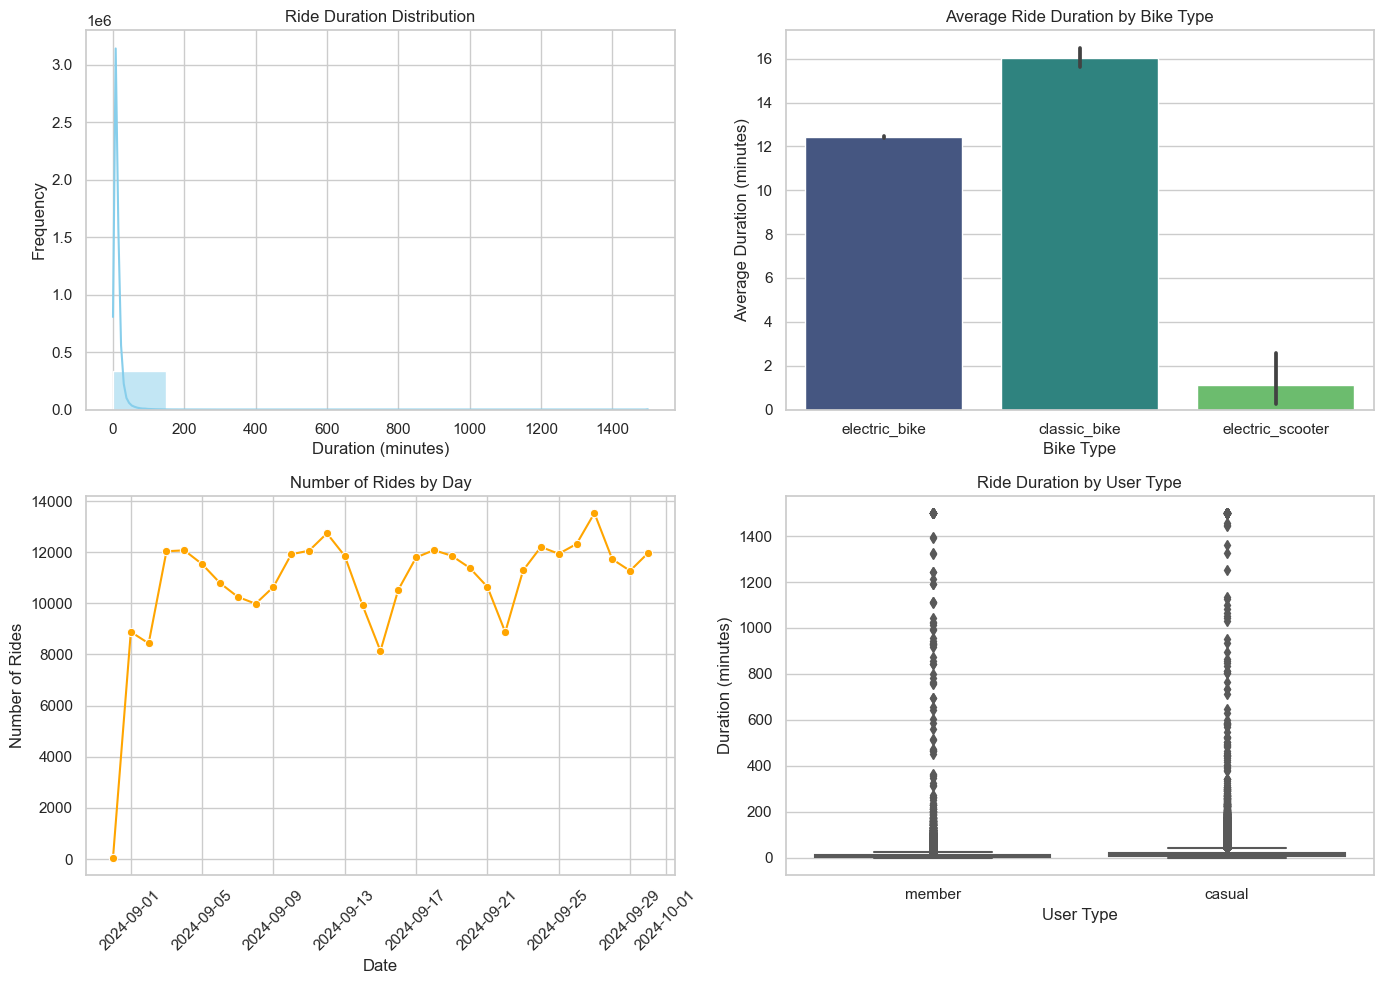

In [72]:

plt.figure(figsize=(14, 10))
sns.set(style='whitegrid')

# 1. Histogram of Ride Duration
plt.subplot(2, 2, 1)
sns.histplot(bw['duration_minutes'], bins=10, kde=True, color='skyblue')
plt.title('Ride Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# 2. Average Ride Duration by Type
plt.subplot(2, 2, 2)
sns.barplot(x='rideable_type', y='duration_minutes', data=bw, estimator='mean', palette='viridis')
plt.title('Average Ride Duration by Bike Type')
plt.xlabel('Bike Type')
plt.ylabel('Average Duration (minutes)')

# 3. Number of Rides by Day
bw['date'] = bw['started_at'].dt.date
rides_per_day = bw['date'].value_counts().sort_index()
plt.subplot(2, 2, 3)
sns.lineplot(x=rides_per_day.index, y=rides_per_day.values, marker='o', color='orange')
plt.title('Number of Rides by Day')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)

# 4. Boxplot of Duration by Member Type
plt.subplot(2, 2, 4)
sns.boxplot(x='member_casual', y='duration_minutes', data=bw, palette='Set2')
plt.title('Ride Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()


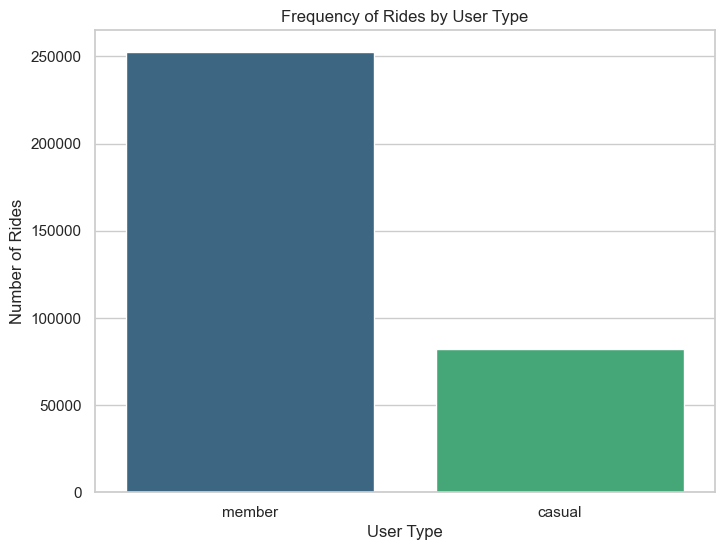

In [76]:
# Frequency of each user type
user_type_counts = bw['member_casual'].value_counts()

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')

sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='viridis')
plt.title('Frequency of Rides by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)

plt.show()

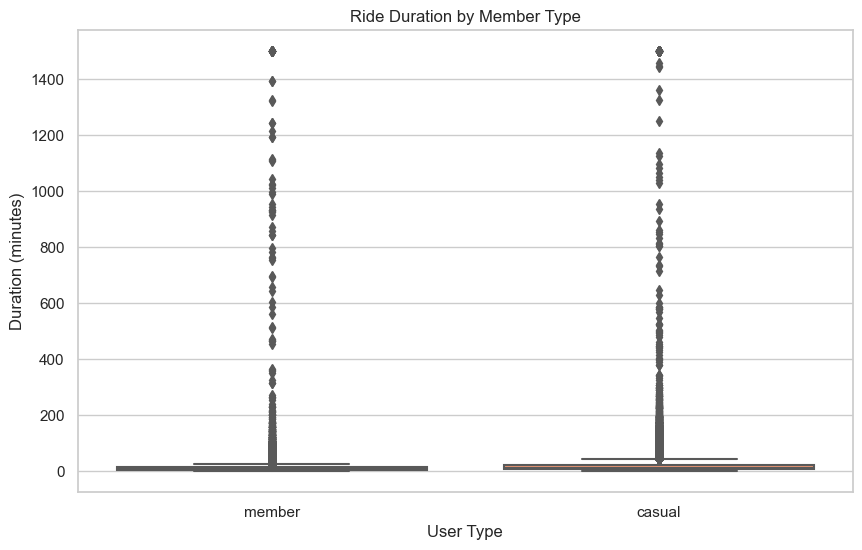

In [78]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Create a boxplot for duration by member type
sns.boxplot(x='member_casual', y='duration_minutes', data=bw, palette='Set2')
plt.title('Ride Duration by Member Type')
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')

# Show the plot
plt.show()

In [88]:
Q1 = bw['duration_minutes'].quantile(0.25)
Q3 = bw['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = bw[(bw['duration_minutes'] < lower_bound) | (bw['duration_minutes'] > upper_bound)]
print(outliers)

                 ride_id  rideable_type              started_at  \
2       52170B200ED0FC6C   classic_bike 2024-09-12 23:20:34.071   
28      F26860DF5897717C  electric_bike 2024-09-29 10:46:32.207   
104     E4B4F3019DEFC351  electric_bike 2024-09-16 14:41:38.459   
113     93013069607A74E9  electric_bike 2024-09-17 20:37:29.200   
114     E4B12829FC9618D3  electric_bike 2024-09-14 13:39:41.539   
...                  ...            ...                     ...   
334584  E981CE4DABD695D9  electric_bike 2024-09-21 18:36:46.241   
334603  9517291AEEAE8B33  electric_bike 2024-09-06 14:04:49.342   
334642  293A5F67CF7C59F1  electric_bike 2024-09-09 12:11:36.587   
334681  0586A1A1441B8E82   classic_bike 2024-09-03 11:00:15.073   
334685  97CEEAF4CF792A36   classic_bike 2024-09-03 10:59:15.697   

                      ended_at                         start_station_name  \
2      2024-09-13 06:46:52.702  Terry Francois Blvd at Mission Bay Blvd N   
28     2024-09-29 11:29:03.671           

In [93]:
long_ride_info = bw[bw['duration_minutes'] > 400]  # Adjust threshold as needed
print(long_ride_info)

                 ride_id rideable_type              started_at  \
2       52170B200ED0FC6C  classic_bike 2024-09-12 23:20:34.071   
364     44B6A13644588C3F  classic_bike 2024-09-03 15:46:02.585   
3682    A1CC55474AF51941  classic_bike 2024-09-24 17:15:53.802   
9783    619D6F0D6A65A71A  classic_bike 2024-09-01 14:06:53.151   
10127   B5E3B3F0771120EF  classic_bike 2024-09-10 16:49:52.452   
...                  ...           ...                     ...   
315860  5D202847CD4F2215  classic_bike 2024-09-03 21:11:46.414   
317372  0BD813B6F2C8D32F  classic_bike 2024-09-29 17:38:53.620   
320022  5E051CACC13B2407  classic_bike 2024-09-04 09:21:57.685   
327074  522EE2561C65122B  classic_bike 2024-09-27 20:46:27.847   
331706  BC1178CF51F761C1  classic_bike 2024-09-28 23:58:00.223   

                      ended_at                         start_station_name  \
2      2024-09-13 06:46:52.702  Terry Francois Blvd at Mission Bay Blvd N   
364    2024-09-04 07:40:11.388                      9

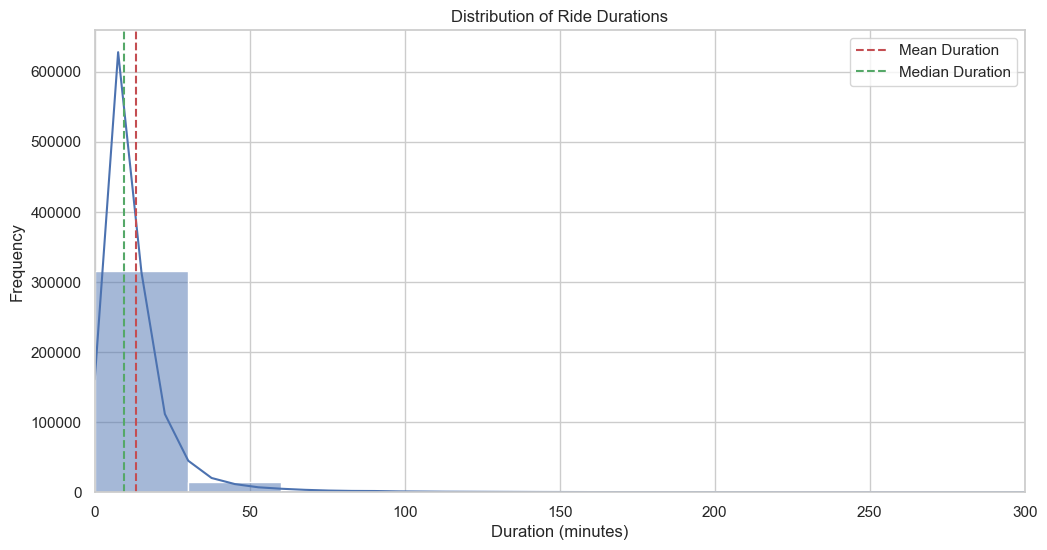

In [90]:
plt.figure(figsize=(12, 6))
sns.histplot(bw['duration_minutes'], bins=50, kde=True)
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 300)  # Limit x-axis to focus on the main distribution
plt.axvline(bw['duration_minutes'].mean(), color='r', linestyle='--', label='Mean Duration')
plt.axvline(bw['duration_minutes'].median(), color='g', linestyle='--', label='Median Duration')
plt.legend()
plt.show()

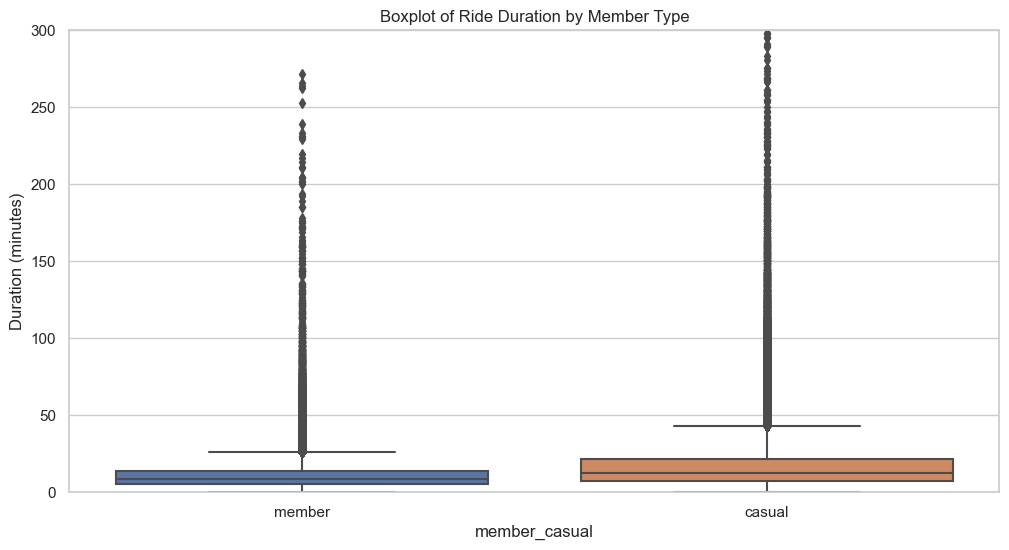

In [91]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='member_casual', y='duration_minutes', data=bw)
plt.title('Boxplot of Ride Duration by Member Type')
plt.ylabel('Duration (minutes)')
plt.ylim(0, 300)  # Set y-axis limits to focus on the main data distribution
plt.show()

In [92]:

Q1 = bw['duration_minutes'].quantile(0.25)
Q3 = bw['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = bw[(bw['duration_minutes'] < lower_bound) | (bw['duration_minutes'] > upper_bound)]
print(outliers[['ride_id', 'duration_minutes']])

                 ride_id  duration_minutes
2       52170B200ED0FC6C        446.310517
28      F26860DF5897717C         42.524400
104     E4B4F3019DEFC351         29.261783
113     93013069607A74E9         40.361117
114     E4B12829FC9618D3         56.914500
...                  ...               ...
334584  E981CE4DABD695D9         39.270467
334603  9517291AEEAE8B33         60.243833
334642  293A5F67CF7C59F1         45.971050
334681  0586A1A1441B8E82         37.502400
334685  97CEEAF4CF792A36         38.595283

[20809 rows x 2 columns]


In [94]:
# remove outlier
filtered_bw = bw[(bw['duration_minutes'] >= lower_bound) & (bw['duration_minutes'] <= upper_bound)]

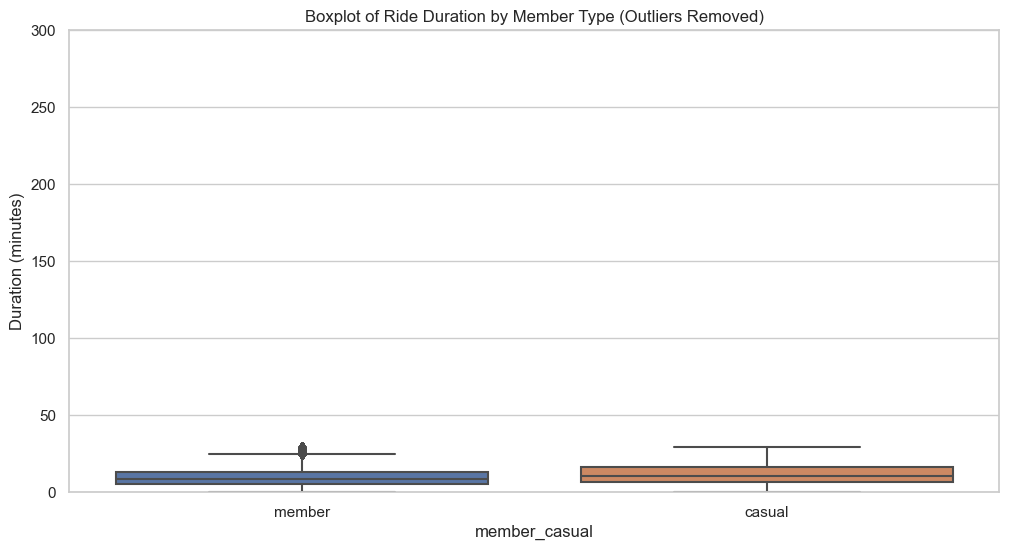

In [95]:
# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='member_casual', y='duration_minutes', data=filtered_bw)
plt.title('Boxplot of Ride Duration by Member Type (Outliers Removed)')
plt.ylabel('Duration (minutes)')
plt.ylim(0, 300)  # Adjust y-axis limits as needed
plt.show()

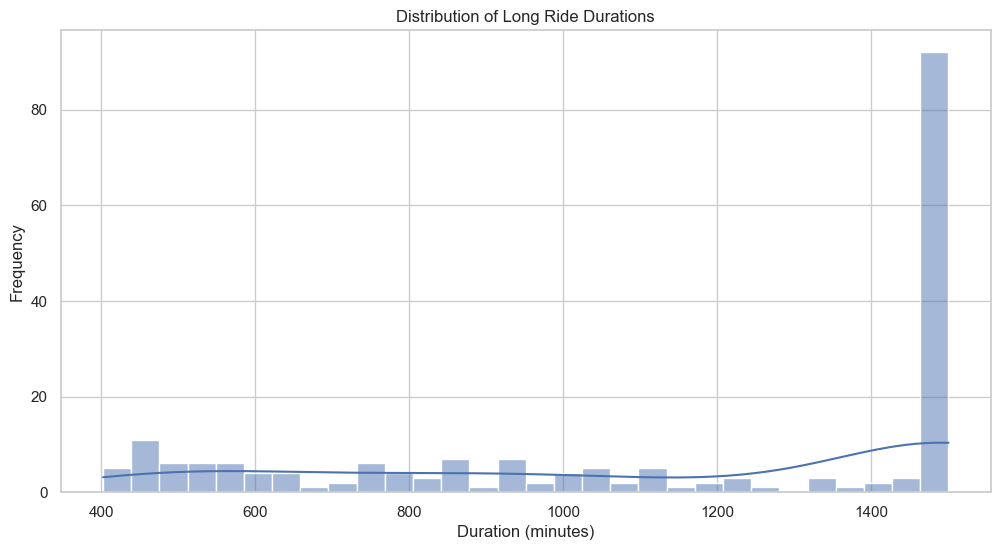

In [96]:
plt.figure(figsize=(12, 6))
sns.histplot(long_ride_info['duration_minutes'], bins=30, kde=True)
plt.title('Distribution of Long Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

/var/folders/sf/qkrwk5617wgdw0frsrqmg17r0000gn/T/ipykernel_78228/3545790592.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_ride_info['duration_bins'] = pd.cut(long_ride_info['duration_minutes'], bins=bins, labels=labels, right=False)


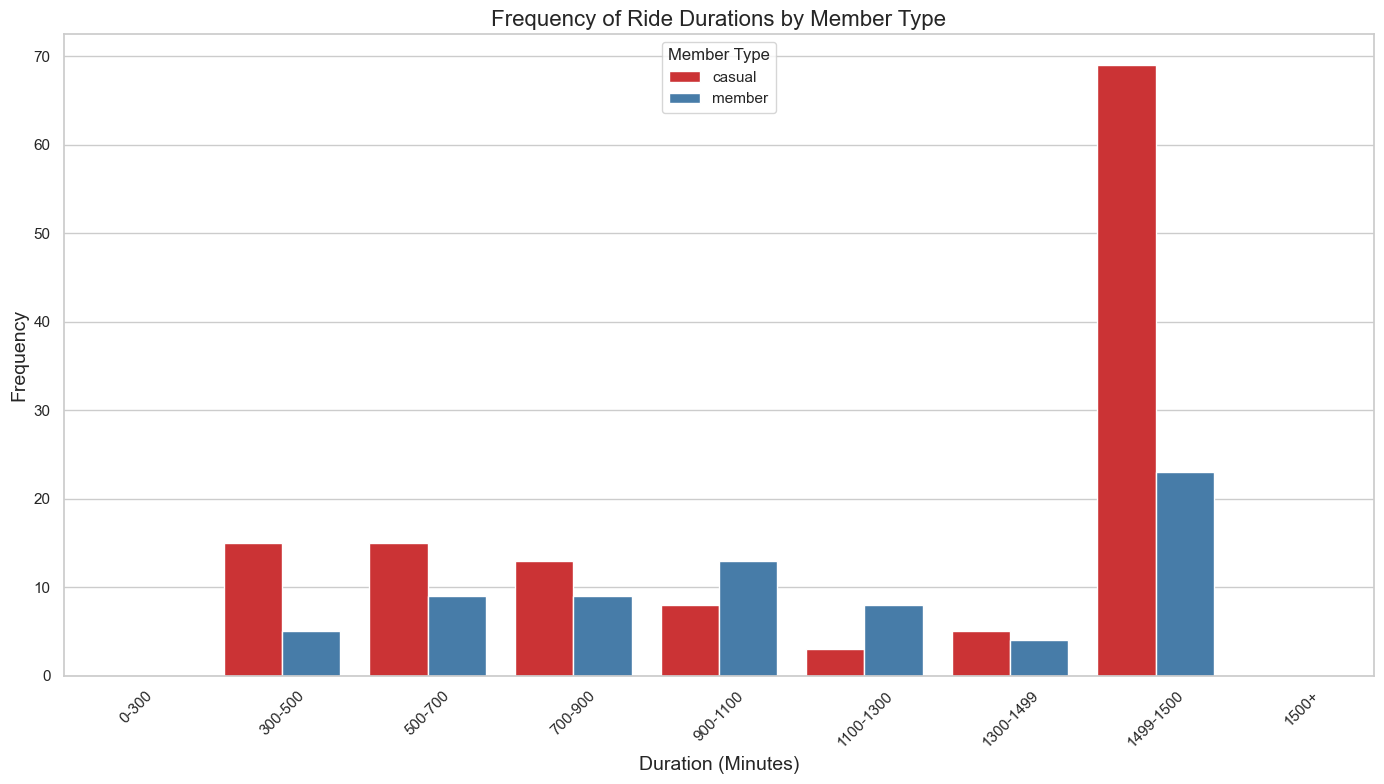

In [110]:
# Freq by Duration

bins = [0, 300, 500, 700, 900, 1100, 1300, 1499, 1500, 2000] 
labels = ['0-300', '300-500', '500-700', '700-900', '900-1100', '1100-1300', '1300-1499', '1499-1500', '1500+']

long_ride_info['duration_bins'] = pd.cut(long_ride_info['duration_minutes'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(14, 8))
sns.countplot(data=long_ride_info, x='duration_bins', hue='member_casual', palette='Set1')

plt.title('Frequency of Ride Durations by Member Type', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Member Type')
plt.tight_layout()

plt.show()
